In [1]:
%load_ext lab_black

# Plot fn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def gr_dataset(X, y, title=None, show=True):
    """plot 2-class dataset. Different colors for different labels"""
    color = np.vectorize(lambda l: "green" if l == 1 else "blue")

    plt.scatter(*X.T, c=color(y))
    x = np.linspace(0, 1, 200)
    plt.ylim(0, 1)
    if title:
        plt.title(title)
    if show:
        plt.show()


def gr_classifier(classifier, X, y, margin=False, title="?"):
    """plot dataset and classifier margin"""

    # these are to plot the contour
    x_range = np.linspace(0, 1, 50)
    y_range = np.linspace(0, 1, 50)
    x_grid, y_grid = np.meshgrid(x_range, y_range)
    z = classifier.predict(np.array((np.ravel(x_grid), np.ravel(y_grid))).T)
    z_grid = z.reshape(x_grid.shape)

    plt.contour(x_grid, y_grid, z_grid, [0], colors="k")

    if margin:
        plt.contour(x_grid, y_grid, z_grid, [-1, 1], colors="k", linestyles="dashed")

    gr_dataset(X, y, show=False)
    plt.title(title)
    plt.show()

# Load Dataset Info in df

In [3]:
from pathlib import Path
from experiments.synthetic_datasets.common import load_dataset

sinusoid_ds_info = []
pacman_ds_info = []
all_ds_info = []
for ds_f in Path("experiments/synthetic_datasets/datasets").iterdir():
    ds = load_dataset(ds_f)
    if ds.params.get("a", None):
        pacman_ds_info.append({"id": ds.id, **ds.params})
    else:
        sinusoid_ds_info.append({"id": ds.id, **ds.params})
    all_ds_info.append({"id": ds.id, **ds.params})

pacman_ds_info = pd.DataFrame(pacman_ds_info)
sinusoid_ds_info = pd.DataFrame(sinusoid_ds_info)
all_ds_info = pd.DataFrame(all_ds_info)

NameError: name 'pd' is not defined

# Load experiments results in df

In [4]:
import pandas as pd
from budgetsvm import optimization

df = pd.read_json("experiments/results/1681565550.7878149.json")

df["budget_percentage"] = df["model_name"].apply(
    lambda x: float(x.split("_")[0]) if "full" not in x else 1.0
)

total_train_time_sec = df.train_time.sum()
df.train_time = df.train_time.div(60)
df = df.rename({"train_time": "train_time_min"}, axis=1)

df_success = df.dropna().copy()
# df_success = df.copy()
# df_success["score"] = df_success.score.apply(lambda x: x if type(x)==float else "0.0")

df_success = df_success.astype(
    {
        "dataset": "string",
        "model_name": "string",
        "optimal": "bool",
        "params": "object",
        "score": "float",
        "budget": "float",
        "num_sv": "float",
        "train_time_min": "float",
    }
)


full_budget_score = df_success.query("budget==inf")[["dataset", "score"]]
df_success = df_success.join(
    full_budget_score.set_index("dataset"), on="dataset", rsuffix="_full_budget"
)
df_success["score_ratio"] = df_success["score"] / df_success["score_full_budget"]

# df_success["dataset"] = df_success["dataset"].apply(lambda x: x[-10:])

df_success.query("dataset == '4b55756bbbdbead1141d0d76f06fc94d'")

,dataset,model_UUID,model_name,optimal,params,score,budget,num_sv,train_time_min,budget_percentage,score_full_budget,score_ratio
32,4b55756bbbdbead1141d0d76f06fc94d,e57c4d12-c91f-4bba-b21e-256382f87509,full_budget,True,"{'C': 1, 'kernel': 'GaussianKernel(sigma=0.1)'}",0.855556,inf,55.0,0.524374,1.0,0.855556,1.000000
33,4b55756bbbdbead1141d0d76f06fc94d,426a605b-0eb7-4e7a-921d-a15b8cc2ba45,0.90_budget,True,"{'C': 1000, 'budget': 49, 'kernel': 'GaussianK...",0.733333,49.0,5.0,25.485554,0.9,0.855556,0.857143
34,4b55756bbbdbead1141d0d76f06fc94d,9ee13843-77ab-46f3-9182-9d443e45d6fb,0.80_budget,False,"{'C': 1, 'budget': 44, 'kernel': 'GaussianKern...",0.000000,44.0,0.0,9.357867,0.8,0.855556,0.000000
35,4b55756bbbdbead1141d0d76f06fc94d,f278a5d0-155c-478e-b719-6b83e9c49813,0.70_budget,True,"{'C': 1000, 'budget': 38, 'kernel': 'GaussianK...",0.533333,38.0,36.0,8.914428,0.7,0.855556,0.623377
36,4b55756bbbdbead1141d0d76f06fc94d,1fdaa42d-2c48-4e92-9bf2-c99ee96db1ef,0.60_budget,True,"{'C': 1000, 'budget': 33, 'kernel': 'GaussianK...",0.500000,33.0,31.0,29.753200,0.6,0.855556,0.584416
37,4b55756bbbdbead1141d0d76f06fc94d,89047aaa-6628-4bc1-abeb-d8e4bf31fb25,0.50_budget,True,"{'C': 1000, 'budget': 27, 'kernel': 'GaussianK...",0.511111,27.0,25.0,29.793360,0.5,0.855556,0.597403
38,4b55756bbbdbead1141d0d76f06fc94d,1de50bea-a6f6-4337-95e7-49ba9213b9f5,0.40_budget,False,"{'C': 1000, 'budget': 22, 'kernel': 'Polynomia...",0.800000,22.0,3.0,12.113411,0.4,0.855556,0.935065
39,4b55756bbbdbead1141d0d76f06fc94d,1f9078e0-c0f1-4ca6-a440-6bd2b07d76f4,0.30_budget,False,"{'C': 1000, 'budget': 16, 'kernel': 'Polynomia...",0.300000,16.0,3.0,13.558347,0.3,0.855556,0.350649


In [5]:
import datetime

print(f"{datetime.timedelta(seconds=total_train_time_sec)} tot. training time")

1 day, 2:00:28.796967 tot. training time


In [6]:
df.dataset.unique()

array(['aeab3ab79c15b777ef6570175a5fce74',
       '56128172aa9004cae34c90457b570a0d',
       '5e735ed352483d7e8600a4b02ab1cd91',
       '446d99c6135509a5b89a4fb06c0ff158',
       '4b55756bbbdbead1141d0d76f06fc94d',
       '8d86f9c4d9e8a5ee56ba7eab2839c22c',
       '94318527131e341506e21068637959a7',
       'c4cb19908ccc9f4bc81304735c4f1dd9',
       'cbb738ae3b2738aea4c36bdc946f7471',
       '0e9c4fa8d7aa710865005e49ac4b7da4',
       '9ed8c9777bd4c58f3cc22c11637764fa',
       '154f5810c2531dec32bb984ab0cf0e80',
       'be6db084d08274d5ad51d9abb135fe44',
       '2acaa7af82f639b5537fe498916b3510',
       '2eb92ac449545a5aaa844bcd9cc31669',
       '2ed3d152be0029a6b6d4c3bff9dddda6',
       'e0689d0e6760af65aa885480d88516d9',
       '055db6f831a688938a3473d8979ebc60'], dtype=object)

In [30]:
all_model_params = pd.json_normalize(df_success["params"])
display(all_model_params.kernel.value_counts())
print()
display(all_model_params.C.value_counts())

PolynomialKernel(2)            58
GaussianKernel(sigma=0.1)      46
GaussianKernel()               17
GaussianKernel(sigma=1e-05)     9
LinearKernel()                  7
PolynomialKernel(10)            3
PolynomialKernel(5)             2
GaussianKernel(sigma=0.01)      2
Name: kernel, dtype: int64

100.000     57
1000.000    39
1.000       26
10.000      12
0.100        6
0.001        3
0.010        1
Name: C, dtype: int64

# Merge similar datasets

In [196]:
def plot_res(dataframe, hue):
    fig, ax = plt.subplots()

    sns.lineplot(
        data=dataframe,
        x="budget_percentage",
        y="score_ratio",
        hue=hue,
        orient="x",
        legend=False,
        ax=ax,
    )
    g = sns.scatterplot(
        data=dataframe,
        x="budget_percentage",
        y="score_ratio",
        hue=hue,
        style="optimal",
        size="optimal",
        markers={True: "o", False: "X"},
        ax=ax,
    )
    plt.axline((0, 0), (1, 1), linestyle="--", linewidth=0.5)

    ax.set(xlim=(0.2, 1.1))
    ax.set(ylim=(0.2, 1.1))

    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    sns.despine()
    plt.show()

    # g = sns.lineplot(data=group, x="budget_percentage", y="score", hue="dataset_id")
    # plt.axhline(y=0.5, linestyle="--", linewidth=0.5)
    # g.set(ylim=(0.0, 1.0))
    # sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
    # sns.despine()
    # plt.show()


from experiments.synthetic_datasets.common import load_dataset


def plot_group_ds(dataframe):
    ds_ids = dataframe["dataset_id"].unique().tolist()

    fig, axs = plt.subplots(1, 3, figsize=(10, 10), sharex=True, sharey=True)
    flat_axs = axs.flat
    for ds_id, ax in zip(ds_ids, flat_axs):
        ds = load_dataset(f"experiments/synthetic_datasets/datasets/{ds_id}.json")
        ax.scatter(*ds.X.T, c=ds.y)
        ax.title.set_text(ds_id[-10:])
        ax.set_box_aspect(1)

    plt.show()

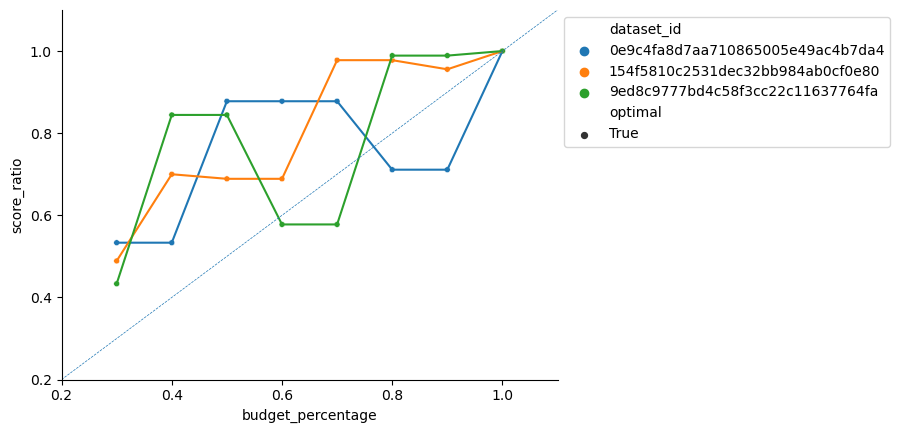

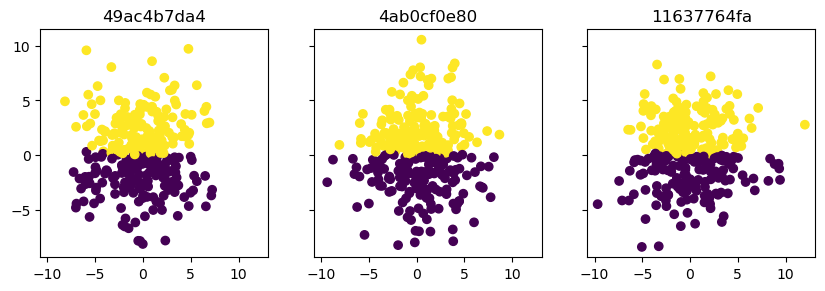

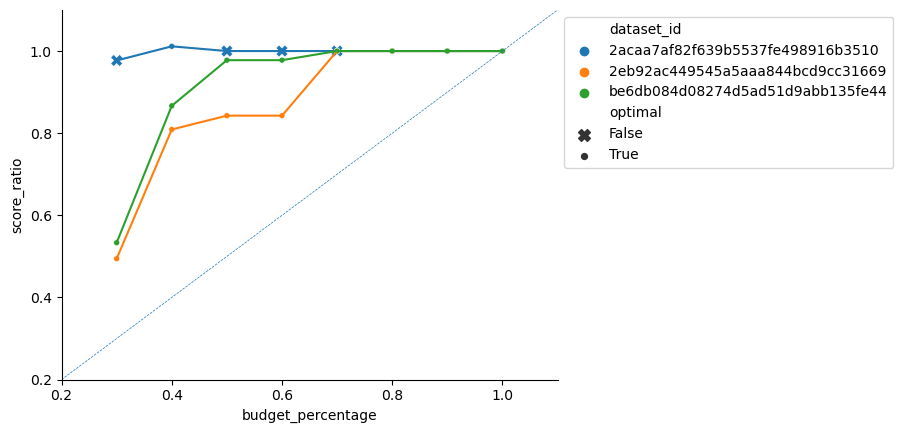

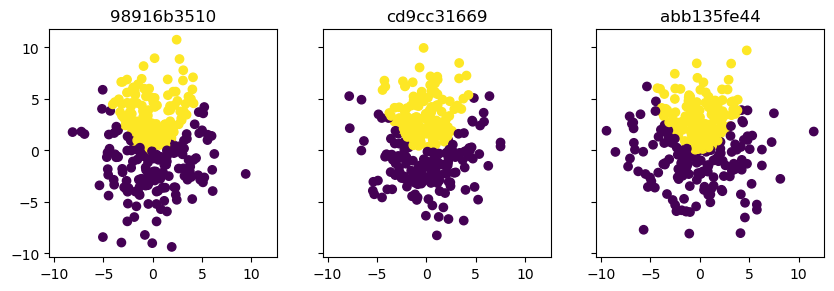

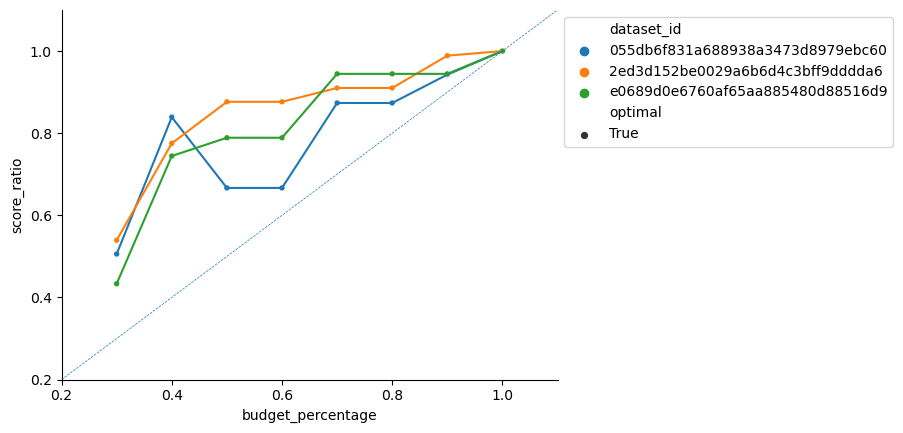

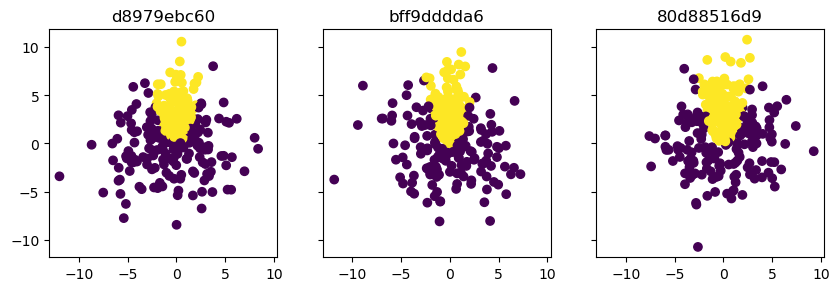

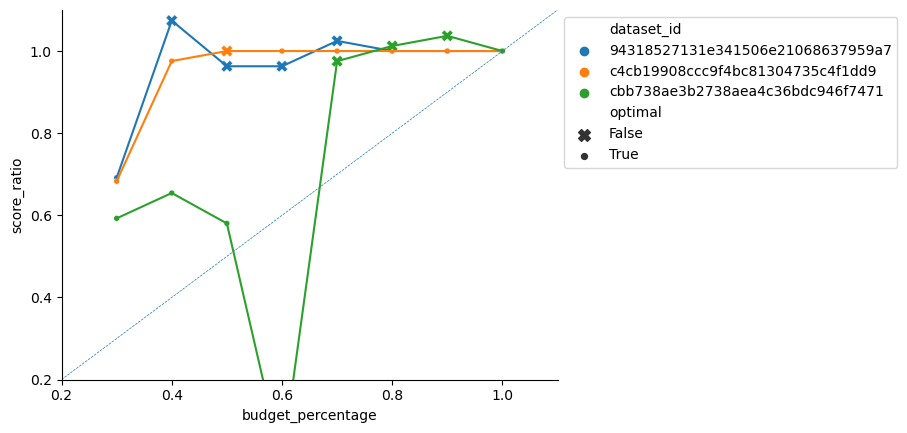

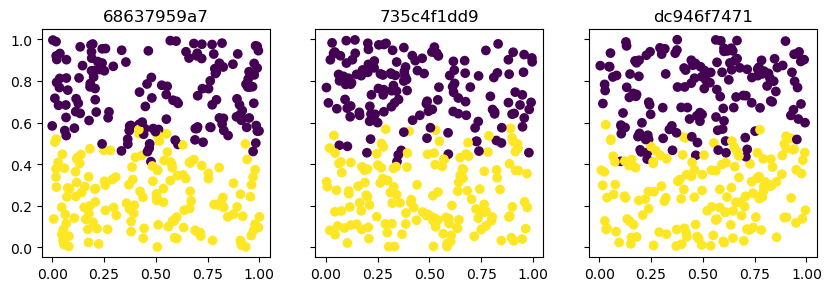

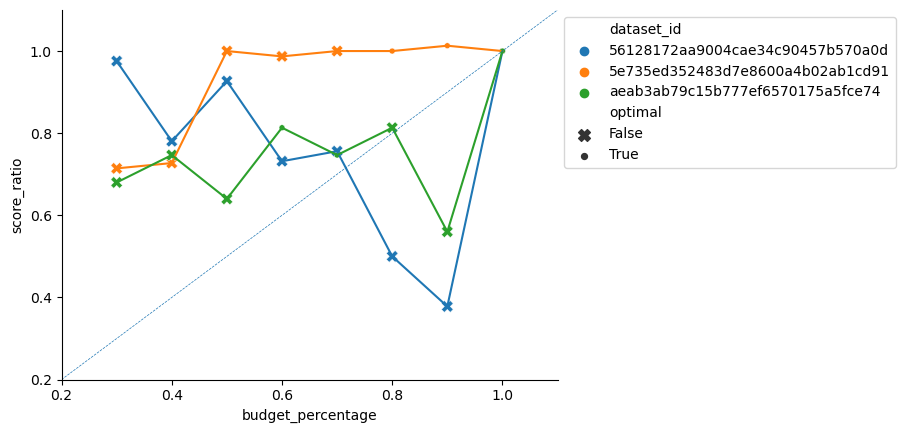

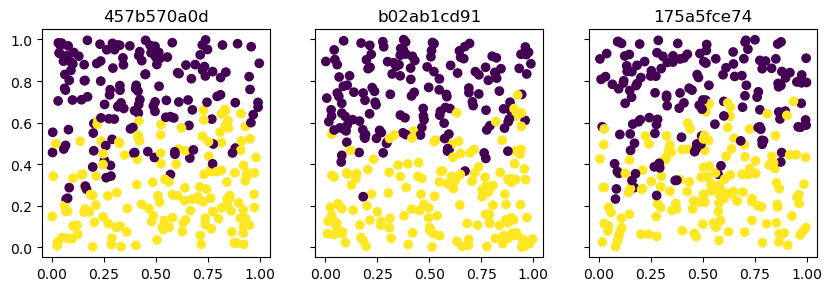

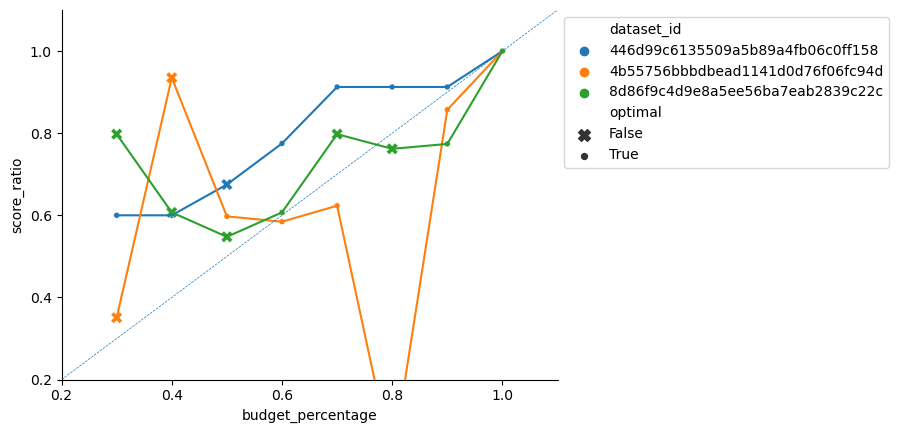

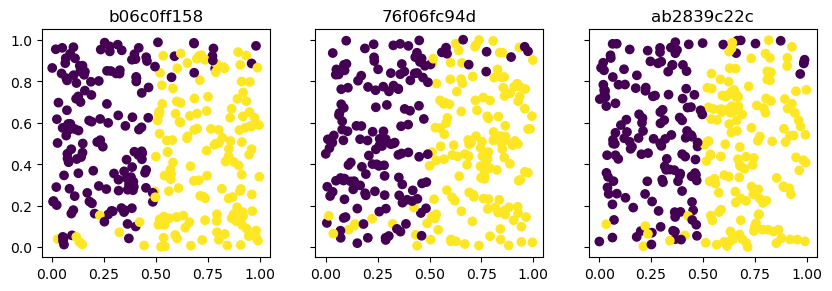

In [197]:
res_df = (
    df_success.set_index("dataset")
    .join(all_ds_info.set_index("id"), rsuffix="_ds_param")
    .reset_index()
    .rename(
        {
            "index": "dataset_id",
        },
        axis=1,
    )
)

sigmoid_res = res_df.query("a.isnull()").dropna(axis=1).copy()
pacman_res = res_df.query("rho.isnull()").dropna(axis=1).copy()

id_map = {}
for i, group in pacman_res.groupby(by=["a", "r", "p"]):
    ds_ids = group.dataset_id.unique().tolist()
    grouped_id = "-".join([x[-5:] for x in ds_ids])
    for ds_id in ds_ids:
        id_map[ds_id] = grouped_id
    plot_res(group, "dataset_id")
    plot_group_ds(group)

for i, group in sigmoid_res.groupby(by=["beta", "rho", "theta"]):
    ds_ids = group.dataset_id.unique().tolist()
    grouped_id = "-".join([x[-5:] for x in ds_ids])
    for ds_id in ds_ids:
        id_map[ds_id] = grouped_id
    plot_res(group, "dataset_id")
    plot_group_ds(group)


pacman_res["grouped_id"] = pacman_res.dataset_id.apply(lambda x: id_map[x])
sigmoid_res["grouped_id"] = sigmoid_res.dataset_id.apply(lambda x: id_map[x])

# Results

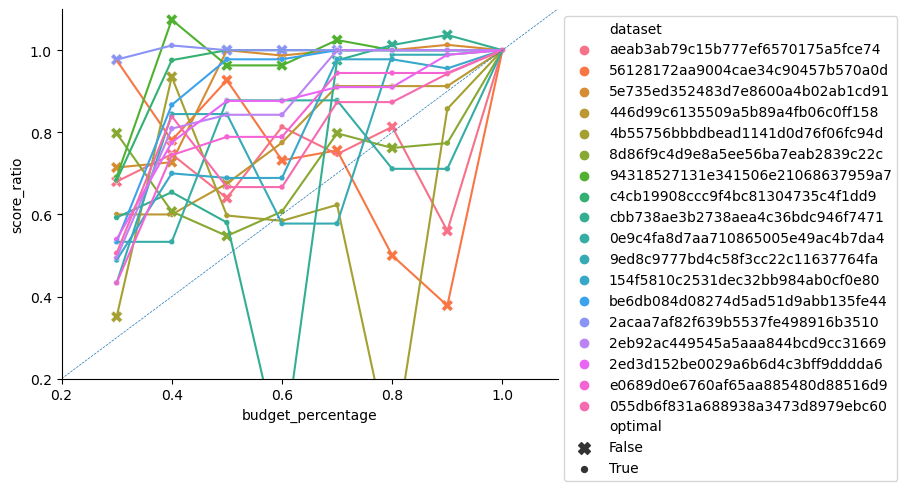

In [114]:
fig, ax = plt.subplots()

sns.lineplot(
    data=df_success,
    x="budget_percentage",
    y="score_ratio",
    hue="dataset",
    orient="x",
    legend=False,
    ax=ax,
)
g = sns.scatterplot(
    data=df_success,
    x="budget_percentage",
    y="score_ratio",
    hue="dataset",
    style="optimal",
    size="optimal",
    markers={True: "o", False: "X"},
    ax=ax,
)
plt.axline((0, 0), (1, 1), linestyle="--", linewidth=0.5)

ax.set(xlim=(0.2, 1.1))
ax.set(ylim=(0.2, 1.1))

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine()

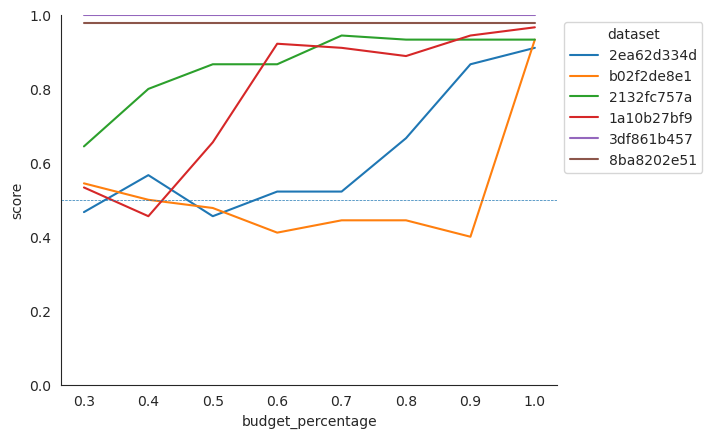

In [79]:
g = sns.lineplot(data=df_success, x="budget_percentage", y="score", hue="dataset")

plt.axhline(y=.5, linestyle="--", linewidth=.5)

g.set(ylim=(0.0, 1.0));

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
sns.despine()

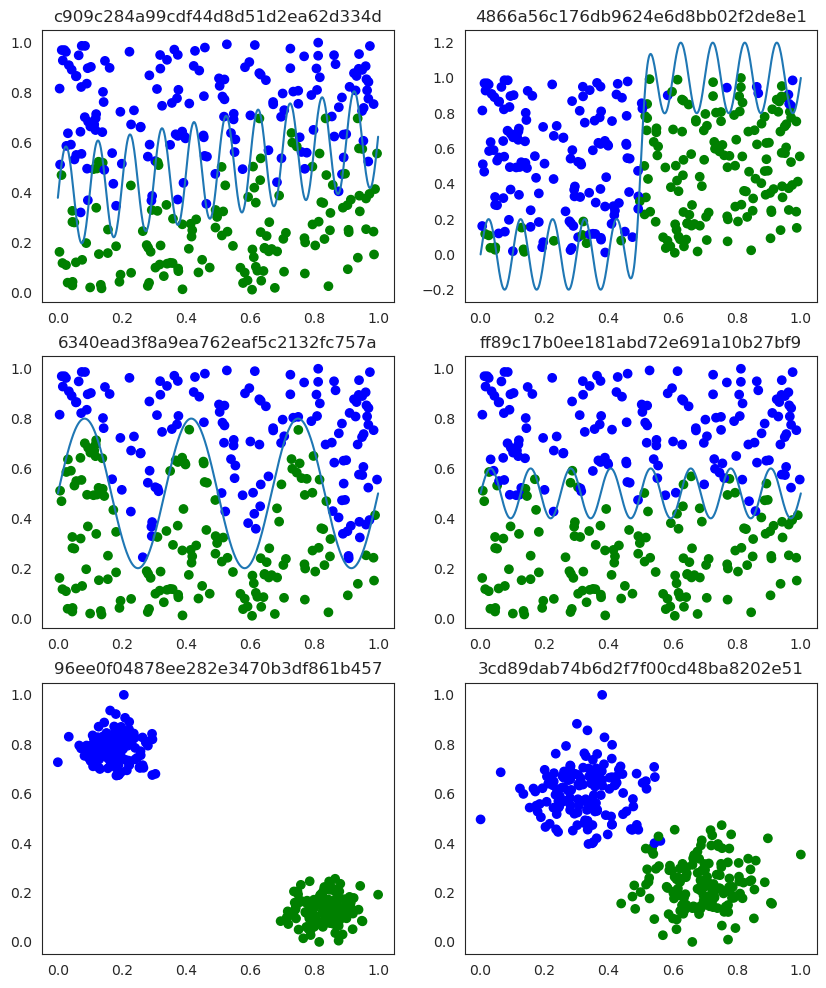

In [132]:
from experiments.datasets import load_dataset
from types import SimpleNamespace

def get_decision_function(beta, rho, theta):
    return lambda x:1 / (1 + np.exp(-beta * (x - 0.5))) + rho * np.sin(2 * np.pi * theta * x)


datasets = df.dataset.unique()

fig, axes = plt.subplots(3, 2, squeeze=False, figsize = (10,12))
for dh, ax in zip(datasets, axes.flatten()):
    ds = load_dataset(f"experiments/datasets/{dh}.json")
    
    ax.title.set_text(dh)
    
    color = np.vectorize(lambda l: 'green' if l == 1 else 'blue')
    ax.scatter(*ds.X.T, c=color(ds.y))
    x = np.linspace(0, 1, 200)
    
    if "beta" in ds.params:
        x_df = np.linspace(0, 1, 500)
        p = SimpleNamespace(**ds.params)
        y_df = get_decision_function(p.beta, p.rho, p.theta)(x_df)
        ax.plot(x_df, y_df)

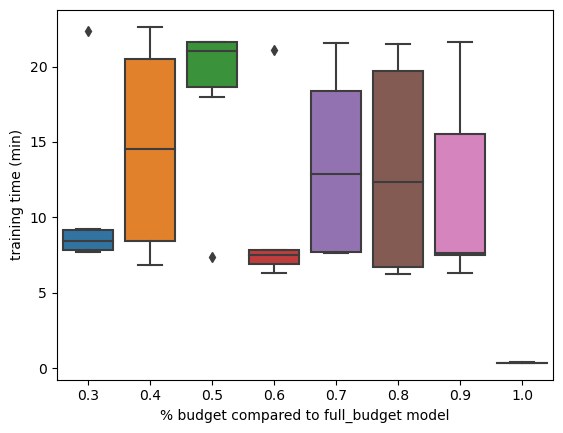

In [10]:
ax = sns.boxplot(
    data=df,
    x="budget_percentage",
    y="train_time_min"
)
ax.set(xlabel='% budget compared to full_budget model', ylabel='training time (min)');

# Same budget as unconstrained model

In [14]:
df

,dataset,model_UUID,model_name,optimal,params,obj_fn_value,score,budget,num_sv,train_time_min,dataset_short
0,c909c284a99cdf44d8d51d2ea62d334d,e313b4e3-bea0-4183-ae2d-718bad153d76,unconstrained,True,"{'C': 1.0, 'kernel': 'GaussianKernel(sigma=0.1)'}",56.298203,0.911111,inf,63,0.385452,2ea62d334d
1,c909c284a99cdf44d8d51d2ea62d334d,b9cb4076-d425-4ac0-b2ba-c3136d8ec27a,100perc_budget,True,"{'C': 1.0, 'kernel': 'GaussianKernel(sigma=0.1)'}",56.298203,0.911111,inf,63,0.375049,2ea62d334d
2,4866a56c176db9624e6d8bb02f2de8e1,190ba03a-058a-4eba-a2ec-3f44fbfa1b26,unconstrained,True,"{'C': 1.0, 'kernel': 'GaussianKernel(sigma=0.1)'}",50.917990,0.933333,inf,51,0.373549,b02f2de8e1
3,4866a56c176db9624e6d8bb02f2de8e1,8376921d-c5b3-4b13-a3c3-67fde653de55,100perc_budget,True,"{'C': 1.0, 'kernel': 'GaussianKernel(sigma=0.1)'}",50.917990,0.933333,inf,51,0.376079,b02f2de8e1
4,6340ead3f8a9ea762eaf5c2132fc757a,bae6ba03-0073-41ff-8e6b-d7c68e88eaaf,unconstrained,True,"{'C': 100.0, 'kernel': 'GaussianKernel(sigma=0...",231.114726,0.933333,inf,47,0.376055,2132fc757a
5,6340ead3f8a9ea762eaf5c2132fc757a,e517287e-881b-4070-bbf5-e8a3b26c5423,100perc_budget,True,"{'C': 100.0, 'kernel': 'GaussianKernel(sigma=0...",231.114726,0.933333,inf,47,0.373179,2132fc757a
6,ff89c17b0ee181abd72e691a10b27bf9,6d191cb9-a3bc-44c2-9212-74189a19737d,unconstrained,True,"{'C': 1.0, 'kernel': 'GaussianKernel(sigma=0.1)'}",41.277807,0.966667,inf,67,0.369239,1a10b27bf9
7,ff89c17b0ee181abd72e691a10b27bf9,5abd087e-1acb-4bae-87d8-dbf364900db5,100perc_budget,True,"{'C': 1.0, 'kernel': 'GaussianKernel(sigma=0.1)'}",41.277807,0.966667,inf,67,0.367812,1a10b27bf9
8,96ee0f04878ee282e3470b3df861b457,9ddb2599-968e-4a0b-988d-a87ae1cebcc8,unconstrained,True,"{'C': 1.0, 'kernel': 'GaussianKernel(sigma=0.1)'}",3.326407,1.000000,inf,14,0.357641,3df861b457
9,96ee0f04878ee282e3470b3df861b457,18d0d1c1-15d6-4763-9d65-05a1c3a89fcd,100perc_budget,True,"{'C': 1.0, 'kernel': 'GaussianKernel(sigma=0.1)'}",3.326407,1.000000,inf,14,0.359994,3df861b457


In [19]:
import pandas as pd
from budgetsvm import optimization

df = pd.read_json("experiments/results/1680714507.691396_100per_budget.json")

total_train_time_sec = df.train_time.sum()
df.train_time = df.train_time.div(60)
df = df.rename({"train_time": "train_time_min"}, axis=1)
df["dataset_short"] = df["dataset"].apply(lambda x: x[-10:])
df.set_index("dataset_short")

def dict_eq(d1,d2):
    return list(d1.keys()).sort() == list(d2.keys()).sort() and list(d2.items()).sort() == list(d2.items()).sort()

res = {}
for ds, group in df.groupby("dataset_short"):
    unc = group.query("model_name=='unconstrained'").iloc[0]
    bud = group.query("model_name=='100perc_budget'").iloc[0]
    
    res[ds] = {
        "same_obj": unc["obj_fn_value"] == bud["obj_fn_value"],
        "same_score": unc["score"] == bud["score"],
        "same_num_sv": unc["num_sv"] == bud["num_sv"],
        "both_optimal": unc["optimal"] and bud["optimal"],
        "same_params": dict_eq(unc["params"], bud["params"])
    }

pd.DataFrame(res).T

,same_obj,same_score,same_num_sv,both_optimal,same_params
1a10b27bf9,True,True,True,True,True
2132fc757a,True,True,True,True,True
2ea62d334d,True,True,True,True,True
3df861b457,True,True,True,True,True
8ba8202e51,True,True,True,True,True
b02f2de8e1,True,True,True,True,True
